# **TINDER Survey**

# Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.subplots as sp

# General overview

In [2]:
tinder = pd.read_csv("data.csv",encoding='ISO-8859-1')
print("Dataset shape: ", tinder.shape, "\n")
pd.options.display.max_columns = None 
print("Dataset preview:")
tinder.head()

Dataset shape:  (8378, 195) 

Dataset preview:


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

First thing to observe is the complexity of this dataset : 195 variables ! We will first drop a few columns which do not seem so important. Concerning the Id of participant, we will only keep "iid" (unique id) and pid (which is the iid of the parner within a date). We will process data a little bit to make graphs better later.

In [3]:
# Drop not interesting columns
tinder = tinder.drop(columns=['id','idg','condtn','round','position','positin1','order','partner','zipcode'])
# Replace numbers by category names
tinder_non_numeric = tinder
tinder_non_numeric['gender'] = tinder_non_numeric['gender'].replace({0: 'Female', 1: 'Male'})
tinder_non_numeric['match'] = tinder_non_numeric['match'].replace({0: 'no', 1: 'yes'})
tinder_non_numeric['samerace'] = tinder_non_numeric['samerace'].replace({0: 'no', 1: 'yes'})
field_codes = {
    1: 'Law',
    2: 'Math',
    3: 'Social Science, Psychologist',
    4: 'Medical Science, Pharmaceuticals, and Bio Tech',
    5: 'Engineering',
    6: 'English/Creative Writing/Journalism',
    7: 'History/Religion/Philosophy',
    8: 'Business/Econ/Finance',
    9: 'Education, Academia',
    10: 'Biological Sciences/Chemistry/Physics',
    11: 'Social Work',
    12: 'Undergrad/undecided',
    13: 'Political Science/International Affairs',
    14: 'Film',
    15: 'Fine Arts/Arts Administration',
    16: 'Languages',
    17: 'Architecture',
    18: 'Other'
}
tinder_non_numeric['field_cd'] = tinder_non_numeric['field_cd'].map(field_codes)
tinder_non_numeric = tinder_non_numeric.dropna(subset=['field_cd'])

# Replace race codes by names
race_codes = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}
tinder_non_numeric['race'] = tinder_non_numeric['race'].replace(race_codes)

# Change income type from str to float
tinder_non_numeric['income'] = tinder_non_numeric['income'].str.replace('[^\d.]', '', regex=True).astype(float)

goal_codes = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}
tinder_non_numeric['goal'] = tinder_non_numeric['goal'].replace(goal_codes)

date_codes = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}
tinder_non_numeric['date'] = tinder_non_numeric['date'].replace(date_codes)

go_out_codes = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}
tinder_non_numeric['go_out'] = tinder_non_numeric['go_out'].replace(go_out_codes)
tinder_non_numeric['dec'] = tinder_non_numeric['dec'].replace({0: 'no', 1: 'yes'})
tinder_non_numeric['dec_o'] = tinder_non_numeric['dec_o'].replace({0: 'no', 1: 'yes'})


In [4]:
total_missing_values = 100 * tinder.isnull().sum().sum() / (tinder.shape[0] * tinder.shape[1])
missing_values = 100 * tinder.isnull().sum() / tinder.shape[0]

print(f"Total Missing values: {total_missing_values:.0f}%\n")
print(f"Missing values per variable:\n{round(missing_values)}%")

Total Missing values: 28%

Missing values per variable:
iid          0.0
gender       0.0
wave         0.0
pid          0.0
match        0.0
            ... 
attr5_3     76.0
sinc5_3     76.0
intel5_3    76.0
fun5_3      76.0
amb5_3      76.0
Length: 186, dtype: float64%


The dataset contains a huge amount of missing values (28%). Let's see why.

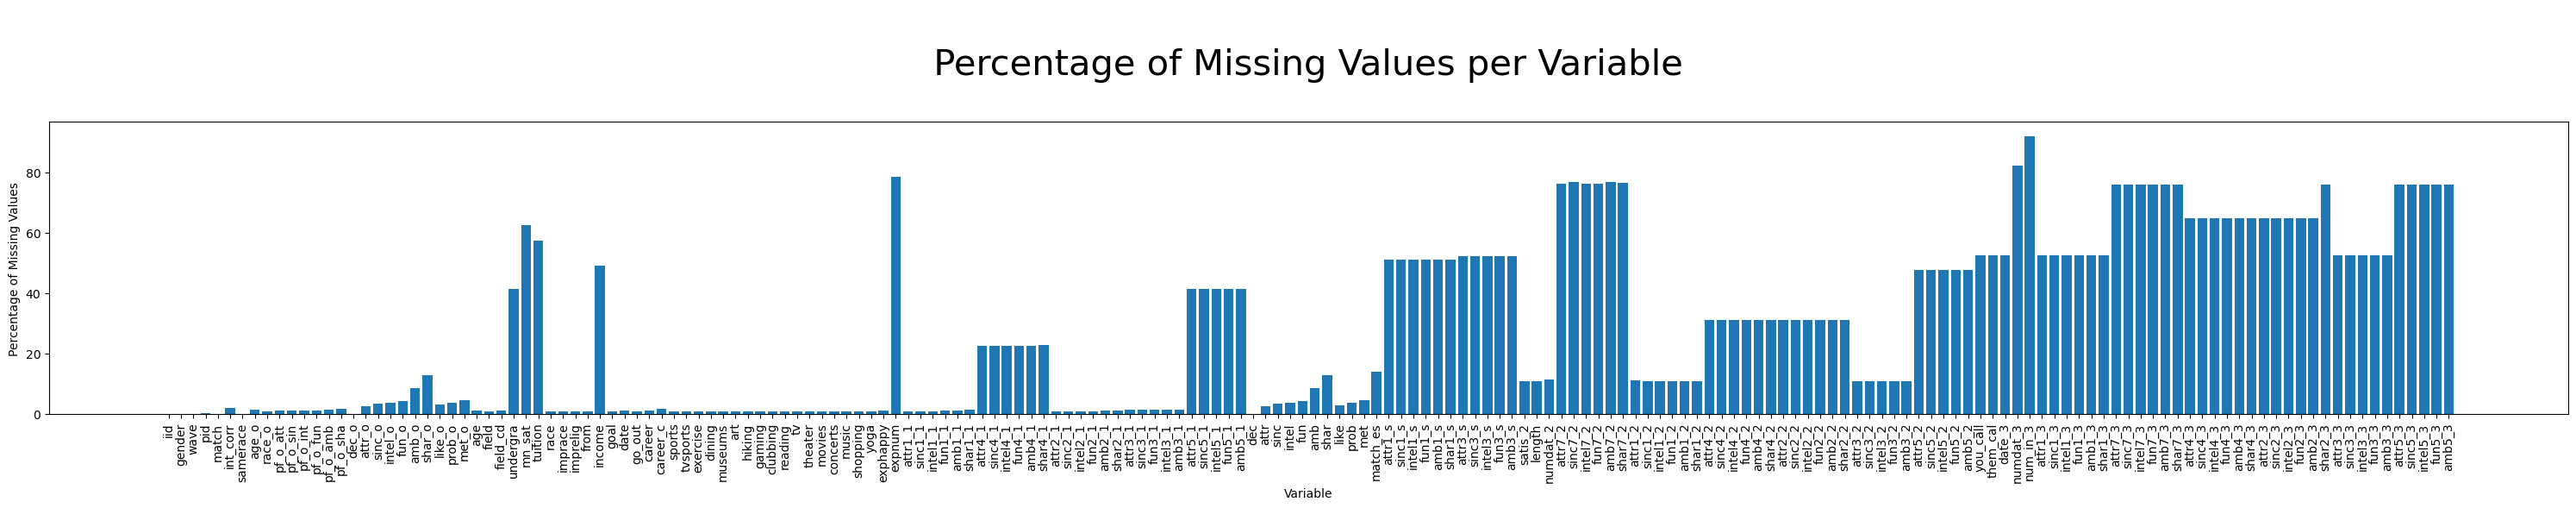

In [5]:
plt.figure(figsize=(30, 6))
plt.bar(missing_values.index, missing_values)
plt.xticks(rotation='vertical', fontsize=10)
plt.xlabel('Variable')
plt.ylabel('Percentage of Missing Values')
plt.title('\n Percentage of Missing Values per Variable \n', fontsize=30)
plt.tight_layout()
plt.show()


In [6]:
print(f'Variables with the highest number of missing values:\n{round(missing_values).sort_values(ascending=False).head(25)}')

Variables with the highest number of missing values:
num_in_3    92.0
numdat_3    82.0
expnum      79.0
amb7_2      77.0
sinc7_2     77.0
shar7_3     76.0
shar7_2     76.0
fun7_2      76.0
intel7_2    76.0
attr7_2     76.0
attr7_3     76.0
sinc7_3     76.0
intel7_3    76.0
fun7_3      76.0
amb5_3      76.0
amb7_3      76.0
fun5_3      76.0
intel5_3    76.0
sinc5_3     76.0
attr5_3     76.0
shar2_3     76.0
intel2_3    65.0
attr2_3     65.0
amb2_3      65.0
fun2_3      65.0
dtype: float64


The columns here are representated in the same order as in the dataset, which means:
- first, some questions filled by the organizers,
- then some premilinary questions to the student about his profile and what he thinks is important for them or for the partner (ending with nothing or "_1"), 
- then we have questions answered DURING the date (ending with nothing or "_s")
- then the DAY AFTER (ending with "_2")
- then 3-4 WEEKS AFTER (ending with "_3")

Now, if we look at the 25 highest variables with missing values : field_cd is a variable to complete by organizer later so it's normal, then we see a lot of variables finishing by _3 and _2 (fields to fill one day later or 3 weeks later). Finally we also see the variable expnum, which is the following question: "Out of the 20 people you will meet, how many do you expect will be interested in dating you?". People seem to not have a great confidence in themselves ! (But it's probably quite hard to know too, let's be fair.)

In [7]:
groups = {
    '1_organizer': tinder.loc[:, 'iid':'attr_o'],
    '2_premiliminary': tinder.loc[:, 'age':'amb5_1'],
    '3_during_date': tinder.loc[:, 'dec':'amb3_s'],
    '4_day_after': tinder.loc[:, 'satis_2':'amb5_2'],
    '5_weeks_after': tinder.loc[:, 'you_call':'amb5_3']
}

missing_values_group = {}

for group, columns in groups.items():
    missing_values = 100 * columns.isnull().sum().sum() / (columns.shape[0] * columns.shape[1])
    missing_values_group[group] = missing_values

missing_values_grouped_df = pd.DataFrame(list(missing_values_group.items()), columns=['Group', 'Percentage'])
fig = px.bar(missing_values_grouped_df, x='Group', y='Percentage', title='Percentage of Missing Values per Group')
fig.show()


We can definitely say that students were not really keen on doing the survey seriously after the dates. Probably only the dates themselves were exciting them. 

In [8]:
print('student_number: ', tinder.iid.nunique())
print('student_partner_number: ', tinder.pid.nunique())

student_number:  551
student_partner_number:  551


There is the same amount of students than partners, it's correct.

# Who are the participants ?

In [9]:
fig = px.histogram(tinder_non_numeric, x='wave', color='gender', barmode='group',
                   labels={'Wave': 'Waves', 'Gender': 'Gender'},
                   title='Participants per Wave by Gender')
fig.show()


There were 21 waves of dates, with few (from 45 people) or many people (maximum was ~1000 people), but always a balanced number of females and males in each wave.

In [10]:
fig = px.box(tinder_non_numeric, y='age', title='Box Plot of Age')
fig.update_layout(width=300, height=400)
fig.show()

Most people are between 24 and 28 years old, with a minimum at 18 years old and a maximum of 55 years old, so it is not representing all ages.

In [11]:
print("Number of fields: ", tinder_non_numeric.field.nunique())
print("Number of fields, once grouped: ", tinder_non_numeric.field_cd.nunique())

Number of fields:  259
Number of fields, once grouped:  18


In [12]:
fig = px.histogram(tinder_non_numeric, y='field_cd', color='gender', barmode='group',
                   orientation='h',
                   title='Distribution of Participants by Field of Study')
fig.show()

A lot of fields are represented (259 fields of study), so we group them by field code (18 in total) with the variable field_cd. Here, we can see that fields are not represented equally at all, neither evenly between males and female. We can see that business field is the most represented and it has ~4x more males than females. Then, sciences and engineering field are the most represented fields, but again, there is much more men in engineering than women. Fields with more women than males are social science, psycology, history/philosophy, medical sciences, art. There is still progress to be made... ! 

In [13]:
specs = [[{'type': 'xy'}, {'type': 'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=['Importance for people','Distribution in the study'])
fig1 = px.box(tinder_non_numeric, y='imprace')
fig2 = px.pie(tinder_non_numeric, names='race')
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.update_layout(title_text="How much is the race of the parner important for people and how are races distributed in this study ?")
fig.show()

In average, race of partner is not too important for people (3 out of 10) but people generally gives an importance between 1 and 6, so for some people it is actually important. Races are clearly not represented equally here. It is mostly European/Caucasian-American.

In [14]:
print("Number of countries where people are from: ", tinder_non_numeric['from'].nunique())

Number of countries where people are from:  268


In [15]:
fig = px.box(tinder_non_numeric, y='imprelig',title='Importance of religion for people')
fig.update_layout(width=300, height=400)
fig.show()

In average, people give an importance of 3 (out of 10) to religion, but answers are quite spread (from 1 to 6 mostly).

In [16]:
missing_values_income = 100 * tinder_non_numeric.income.isnull().sum() / tinder_non_numeric.income.shape[0]
fig = px.histogram(tinder_non_numeric, x='income', color='gender', title=f'Income Distribution (be aware of missing values: {missing_values_income:.0f}%)', nbins=60)
fig.show()

Salaries go from very low (0-10K) to crazy high (110K) with quite a huge different between men and women. We can wonder if this is due to the fact that there are more males than women in some fields like business and engineering, so is it a sector effect ? Or can we see also see a big difference between men and women within the same sectors ?

In [17]:
avg_income_per_field_gender = tinder_non_numeric.groupby(['field_cd', 'gender'])['income'].mean().reset_index()
fig = px.bar(avg_income_per_field_gender, y='field_cd', x='income', color='gender', orientation='h', barmode='group', title='Average Income per Field of Study by Gender')
fig.show()


Actually, males are not better paid in ALL fields:
- Where men are paid more than women: social, math, engineering, education, business/finance
- Where women are paid more than men: mainly law (but a bit politics also)

The most important differences are seen in engineering/education/math and law.

In [18]:
specs = [[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]
fig = make_subplots(rows=1, cols=3, specs=specs, subplot_titles=['Goal', 'Date frequency', 'Going Out'])

fig1 = px.pie(tinder_non_numeric, names='goal', title='Distribution of Goals')
fig1.update_traces(textposition='inside', textinfo='label', showlegend=False)

fig2 = px.pie(tinder_non_numeric, names='date', title='Distribution of Date Frequencies')
fig2.update_traces(textposition='inside', textinfo='label', showlegend=False)

fig3 = px.pie(tinder_non_numeric, names='go_out', title='Distribution of Going Out Frequencies')
fig3.update_traces(textposition='inside', textinfo='label', showlegend=False)

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

fig.update_layout(title_text="Distribution of Goals, Date Frequencies, and Going Out Frequencies")
fig.show()


People answered this survey mostly just for fun or to meet people without expecting anything. Most of them are sometimes dating but not crazy about it (twice a month max). However, most people interviewed go out a lot during the week.

# What people look for in a relationship

In waves 6-9, the ranking was out of 10 for each criterium whereas for all other waves ranking was out of 100. So we eliminate waves 6-9 from this analysis.

In [19]:
# Filterout rows where 'wave' is 6, 7, 8, or 9
tinder_minus_waves6789 = tinder[~tinder['wave'].isin([6, 7, 8, 9])]

fig = make_subplots(rows=1,cols=3,horizontal_spacing=0.15,specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]],
    subplot_titles=['What you look for', 'What you think same sex look for', 'What you think opposite sex look for'])

variables = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
             'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
             'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',]

labels = ['attractive', 'sincere', 'intelligent', 'fun', 'ambitious', 'shares interests']

male_color = 'blue'
female_color = 'red'

for i in range(3):
    # For each graph we select the corresponding variables ...
    graph_variables = tinder_minus_waves6789.groupby('gender')[variables[i*6:(i+1)*6]].mean() # 0-5 for graph 1 , then 6 to 11 for the 2nd, 12 to 17 for the 3rd
    # ... then we plot one line per gender
    for gender in ['Male', 'Female']:
        line_color = male_color if gender == 'Male' else female_color
        fig.add_trace(
            go.Scatterpolar(r=graph_variables.loc[gender],theta=labels,mode='lines',name=gender,line=dict(color=line_color)),row=1, col=i+1)

fig.update_layout(showlegend=True,height=400,width=1000)
fig.show()


First obvious thing to notice, is that attractiveness is much more important for men than women, and women are aware about it. It is actually the only important criterium for men, except maybe a little bit of intelligence. For women, it seems that all criteria have similar importance, intelligence being the top criterium. It's quite surprising that for both women and men, sharing some interests and sincerity do not seem so important. 

But in reality, when a person says "yes" or "no", is it due to what they think ?

Note: For each of the previous graphs, are available the same variables at different times (1 day after the date and few weeks later), but in my opinion this is not very relevant: if I'm interested more in intelligence, this is not gonna change one day later of weeks later, same for what I think same sex or opposite sex look for, or how I rate myself. Also, those data have a lot of missing values, so we won't analyze those variables. 

In [20]:
# Datasets for a decision yes or no
tinder_minus_waves6789_yes = tinder_minus_waves6789[tinder_minus_waves6789['dec'] == 1]
tinder_minus_waves6789_no = tinder_minus_waves6789[tinder_minus_waves6789['dec'] == 0]

fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'polar'}, {'type': 'polar'}]], subplot_titles=['They said yes: why ?', 'They said no: why ?'])

variables = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar'] # mark gave to the parner

graph_variables_yes = tinder_minus_waves6789_yes.groupby('gender')[variables].mean()
graph_variables_no = tinder_minus_waves6789_no.groupby('gender')[variables].mean()

for gender in ['Male', 'Female']:
    line_color = male_color if gender == 'Male' else female_color
    fig.add_trace(go.Scatterpolar(r=graph_variables_yes.loc[gender], theta=labels, mode='lines', name=gender, line=dict(color=line_color)),row=1, col=1)
    fig.add_trace(go.Scatterpolar(r=graph_variables_no.loc[gender], theta=labels, mode='lines', name=gender, line=dict(color=line_color)),row=1, col=2)

fig.update_layout(showlegend=True, height=400, width=1000, title='And in reality, are the same criteria important?')  
fig.show()


Actually it seems that attractivity is much more important for women that what they think : in average, the parners that they refuse are intelligent, sincere and ambitious but less attractive and less fun than those they accept. And fun fact: men and women think they don't care too much about sharing same interests, but for both of them, partners for who they said "no" low shared interests. So sharing interests is more important than they think...

In [29]:
fig = make_subplots(rows=1,cols=2,specs=[[{'type': 'polar'}, {'type': 'polar'}]],
    subplot_titles=['Rate yourself', 'How you think people rate you'])

variables = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1',
             'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']

for i in range(2):
    graph_variables = tinder_minus_waves6789.groupby('gender')[variables].mean()
    for gender in ['Male', 'Female']:
        line_color = male_color if gender == 'Male' else female_color
        fig.add_trace(go.Scatterpolar(r=graph_variables.loc[gender],theta=labels,mode='lines',name=gender,line=dict(color=line_color)),row=1, col=i+1)

fig.update_layout(showlegend=True,height=400,width=800)
fig.show()


In general, people have a very good opinion of themselves in all criteria, especially sincerity (?? which was the criterium that they care the less about) and intelligence. I don't notice any big difference between men and women, neither their own opinion vs how they think people see them.

In [22]:
# Remove columns for Time s, Time 2 and Time 3
tinder = tinder.loc[:, ~tinder.columns.str.endswith(('_2', '_3', '_s'))]
tinder_minus_waves6789 = tinder_minus_waves6789.loc[:, ~tinder_minus_waves6789.columns.str.endswith(('_2', '_3','_s'))]

# Who matches ?

In [23]:
tinder_match = tinder_minus_waves6789[tinder_minus_waves6789['match']=='yes']
tinder_no_match = tinder_minus_waves6789[tinder_minus_waves6789['match']=='no']
print("Percentage of matches in this study: ",round(len(tinder_match)*100/len(tinder_minus_waves6789)),"%")
tinder_yes = tinder_minus_waves6789[tinder_minus_waves6789['dec']==1]
print("Percentage of 'yes' in this study: ",round(len(tinder_yes)*100/len(tinder_minus_waves6789)),"%")

Percentage of matches in this study:  16 %
Percentage of 'yes' in this study:  42 %


The number of matches is quite low (16%), even though almost half of the decisions taken are "yes" from one of the 2 people.

In [24]:
fig = px.histogram(tinder, x='dec', color='gender', barmode='group',title='Decisions on the night of the event')
fig.show()

Women say less yes than men.

In [25]:
percentage_same_race = 100 * len(tinder_match[tinder_match['samerace']=='yes']) / len(tinder_match)
same_race_match = pd.DataFrame({
    'samerace': ['Same Race', 'Not Same Race'],
    'percentage': [percentage_same_race, 100-percentage_same_race]
})

fig = px.bar(same_race_match,x='samerace',y='percentage',title='Percentage of Same Races Match',labels={'percentage': 'Percentage (%)'})
fig.show()

Being of the same race does not seem to have a big impact (more matches when not the same race).

In [31]:
# Here we calculate for each variable goal, date and go_out the % of match for each category
grouped_goal = tinder_non_numeric.groupby('goal')['match'].apply(lambda x: (x == 'yes').mean() * 100)
grouped_date = tinder_non_numeric.groupby('date')['match'].apply(lambda x: (x == 'yes').mean() * 100)
grouped_go_out = tinder_non_numeric.groupby('go_out')['match'].apply(lambda x: (x == 'yes').mean() * 100)

# We sort by highest percentage
grouped_goal = grouped_goal.sort_values(ascending=False)
grouped_date = grouped_date.sort_values(ascending=False)
grouped_go_out = grouped_go_out.sort_values(ascending=False)

# Histogram for each variable
fig = make_subplots(rows=1, cols=3, subplot_titles=['Goal', 'Date frequency', 'Going Out'])

fig.add_trace(go.Bar(x=grouped_goal.index, y=grouped_goal.values, name='Goal', showlegend=False), row=1, col=1)
fig.add_trace(go.Bar(x=grouped_date.index, y=grouped_date.values, name='Date Frequency', showlegend=False), row=1, col=2)
fig.add_trace(go.Bar(x=grouped_go_out.index, y=grouped_go_out.values, name='Going Out Frequency', showlegend=False), row=1, col=3)

fig.update_layout(title_text="Percentages of match for each category in Goals, Date Frequencies, and Going Out Frequencies",
                  xaxis=dict(tickangle=45),
                  yaxis=dict(title='% Matched (yes)'))
fig.show()


The graphs above show that people whose goal in this survey was to get a date are not the ones that have the most matches! Those who have frequent dates (several times a week) get significantly more matches ! Also, the more people go out during the year, the more they got matches here. Which makes sense: they are more used to talk to people, to socialize, to flirt etc. 

In [32]:
interests_df = pd.DataFrame()

interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Here we iterate through each row to get a person iid, its partner iid (pid), its interests and its partner's interests
for _, row in tinder_match.iterrows():
    iid = row['iid']
    pid = row['pid']
    gender = row['gender']
    interests_iid = row[interests].values
    partner_interests = tinder_match[tinder_match['iid'] == pid][interests].values
    # we add them to the result dataset
    if len(partner_interests) > 0:
        partner_interests = partner_interests[0]
        interests_df = interests_df.append({
            'iid': iid,
            'gender': gender,
            'pid': pid,
            **{f'{interest}_iid': interests_iid[i] for i, interest in enumerate(interests)},
            **{f'{interest}_partner': partner_interests[i] for i, interest in enumerate(interests)}
        }, ignore_index=True)

C:\Users\elodi\AppData\Local\Temp\ipykernel_12376\4274035534.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\elodi\AppData\Local\Temp\ipykernel_12376\4274035534.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\elodi\AppData\Local\Temp\ipykernel_12376\4274035534.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\elodi\AppData\Local\Temp\ipykernel_12376\4274035534.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\elodi\AppData\Local\Temp\ipykernel_12376\4274035534.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

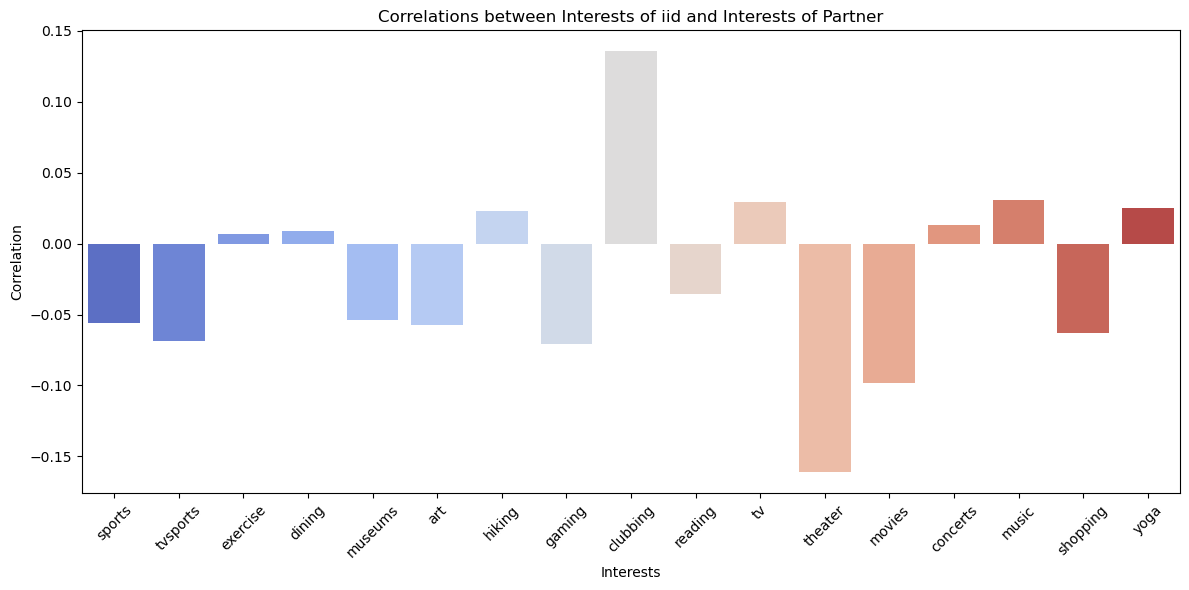

In [33]:
correlation_data = []
for interest in interests:
    correlation = interests_df[[f'{interest}_iid', f'{interest}_partner']].corr().iloc[0, 1]
    correlation_data.append({'Interest': interest, 'Correlation': correlation})

correlation_df = pd.DataFrame(correlation_data)

plt.figure(figsize=(12, 6))
sns.barplot(x='Interest', y='Correlation', data=correlation_df, palette='coolwarm')
plt.title('Correlations between Interests of iid and Interests of Partner')
plt.xlabel('Interests')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The previous graph shows that people who match have a tendency to have only one important criteria to have in common : clubbing. Music, tv, yoga and hiking could be slightly important too. On the other side, we also observe that if one person like theater/movies a lot but not the other one, it could be a way to create a match (maybe attracted to people who can show them new fields). Same thing seen also slightly for sports, tvsports, museums, art, gaming and shopping.